In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('../../../BayesFlow')))

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

import tensorflow as tf

In [2]:
from bayesflow import benchmarks
from bayesflow.amortizers import AmortizedPosterior, AmortizedLikelihood, AmortizedPosteriorLikelihood
from bayesflow.networks import InvertibleNetwork
from bayesflow.trainers import Trainer
from bayesflow.diagnostics import plot_sbc_ecdf, plot_recovery, plot_posterior_2d, plot_losses, plot_latent_space_2d

/home/jupyter/BayesFlow/bayesflow/trainers.py:24: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
from tensorflow_probability import distributions as tfd

In [4]:
benchmark_name = 'slcp'
benchmark = benchmarks.Benchmark(benchmark_name)

INFO:root:Performing 2 pilot runs with the slcp model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 5)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 8)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.


# Amortizer and Trainer

In [18]:
SETTINGS_POST = {
    't_args': {
        'dense_args': dict(units=128, activation='tanh'),
        'n_dense': 2,
        'dropout': True,
        'dropout_prob': 0.3
    },
    's_args': {
        'dense_args': dict(units=128, activation='tanh'),
        'n_dense': 2,
        'dropout': True,
        'dropout_prob': 0.3
    }
}

SETTINGS_LIK = {
    't_args': {
        'dense_args': dict(units=128, activation='tanh'),
        'n_dense': 2,
        'dropout': True,
        'dropout_prob': 0.3
    },
    's_args': {
        'dense_args': dict(units=128, activation='tanh'),
        'n_dense': 2,
        'dropout': True,
        'dropout_prob': 0.3
    }
}

latent_dist_p = tfd.MultivariateStudentTLinearOperator(
    df=10, loc=[0.]*5, scale=tf.linalg.LinearOperatorDiag([1.]*5))
latent_dist_l = tfd.MultivariateStudentTLinearOperator(
    df=10, loc=[0.]*8, scale=tf.linalg.LinearOperatorDiag([1.]*8))

amortizer = AmortizedPosteriorLikelihood(
    AmortizedPosterior(
        InvertibleNetwork(num_params=5, num_coupling_layers=10, use_soft_flow=True, coupling_net_settings=SETTINGS_POST),
        latent_dist=latent_dist_p),
    AmortizedLikelihood(
        InvertibleNetwork(num_params=8, num_coupling_layers=4, coupling_net_settings=SETTINGS_LIK),
        latent_dist=latent_dist_l)
)

In [19]:
trainer = Trainer(
    amortizer=amortizer,
    default_lr=5e-4,
    generative_model=benchmark.generative_model,
    configurator=benchmark.configurator,
    checkpoint_path=f'checkpoints/{benchmark_name}',
    memory=False   
)

INFO:root:Initialized empty loss history.
INFO:root:Initialized networks from scratch.
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


# Training

Uncomment for training.

In [20]:
EPOCHS = 300
SIMULATION_BUDGET = 10000
BATCH_SIZE = 128
N_VAL = 300

train_data = trainer.generative_model(SIMULATION_BUDGET)

h = trainer.train_offline(train_data, EPOCHS, BATCH_SIZE, validation_sims=N_VAL)

INFO:root:Generated 300 simulations for validation.


Training epoch 1:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 2:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 3:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 4:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 5:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 6:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 7:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 8:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 9:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 10:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 11:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 12:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 13:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 14:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 15:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 16:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 17:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 18:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 19:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 20:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 21:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 22:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 23:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 24:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 25:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 26:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 27:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 28:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 29:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 30:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 31:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 32:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 33:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 34:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 35:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 36:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 37:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 38:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 39:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 40:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 41:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 42:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 43:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 44:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 45:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 46:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 47:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 48:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 49:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 50:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 51:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 52:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 53:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 54:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 55:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 56:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 57:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 58:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 59:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 60:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 61:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 62:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 63:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 64:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 65:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 66:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 67:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 68:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 69:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 70:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 71:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 72:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 73:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 74:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 75:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 76:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 77:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 78:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 79:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 80:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 81:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 82:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 83:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 84:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 85:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 86:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 87:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 88:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 89:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 90:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 91:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 92:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 93:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 94:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 95:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 96:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 97:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 98:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 99:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 100:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 101:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 102:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 103:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 104:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 105:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 106:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 107:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 108:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 109:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 110:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 111:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 112:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 113:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 114:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 115:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 116:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 117:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 118:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 119:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 120:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 121:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 122:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 123:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 124:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 125:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 126:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 127:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 128:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 129:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 130:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 131:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 132:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 133:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 134:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 135:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 136:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 137:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 138:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 139:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 140:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 141:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 142:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 143:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 144:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 145:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 146:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 147:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 148:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 149:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 150:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 151:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 152:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 153:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 154:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 155:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 156:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 157:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 158:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 159:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 160:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 161:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 162:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 163:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 164:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 165:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 166:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 167:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 168:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 169:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 170:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 171:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 172:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 173:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 174:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 175:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 176:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 177:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 178:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 179:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 180:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 181:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 182:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 183:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 184:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 185:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 186:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 187:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 188:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 189:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 190:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 191:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 192:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 193:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 194:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 195:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 196:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 197:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 198:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 199:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 200:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 201:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 202:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 203:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 204:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 205:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 206:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 207:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 208:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 209:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 210:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 211:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 212:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 213:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 214:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 215:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 216:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 217:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 218:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 219:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 220:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 221:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 222:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 223:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 224:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 225:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 226:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 227:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 228:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 229:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 230:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 231:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 232:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 233:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 234:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 235:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 236:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 237:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 238:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 239:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 240:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 241:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 242:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 243:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 244:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 245:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 246:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 247:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 248:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 249:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 250:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 251:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 252:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 253:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 254:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 255:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 256:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 257:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 258:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 259:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 260:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 261:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 262:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 263:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 264:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 265:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 266:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 267:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 268:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 269:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 270:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 271:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 272:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 273:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 274:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 275:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 276:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 277:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 278:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 279:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 280:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 281:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 282:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 283:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 284:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 285:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 286:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 287:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 288:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 289:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 290:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 291:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 292:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 293:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 294:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 295:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 296:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 297:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 298:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 299:   0%|          | 0/79 [00:00<?, ?it/s]

Training epoch 300:   0%|          | 0/79 [00:00<?, ?it/s]

# Validation

## Loss Trajectories

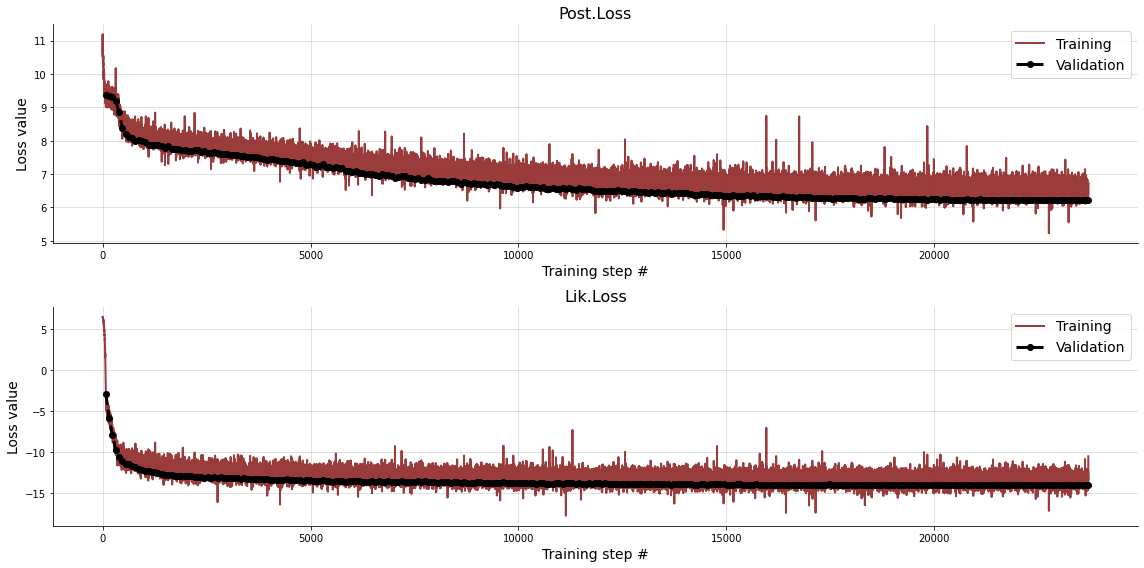

In [21]:
# Use loaded history, since reference 'h' will only exist after training
h = trainer.loss_history.get_plottable()
f = plot_losses(h['train_losses'], h['val_losses'])

## Test (Held-Out) Data

In [11]:
# Load test data
with open(f'test_data/{benchmark_name}_test.pkl', 'rb') as f:
    test_dict = pickle.load(f)

### Latent Inspection

In [28]:
out_p, out_l = amortizer(test_dict)
z_p = out_p[0]
z_l = out_l[0]

#### Posterior

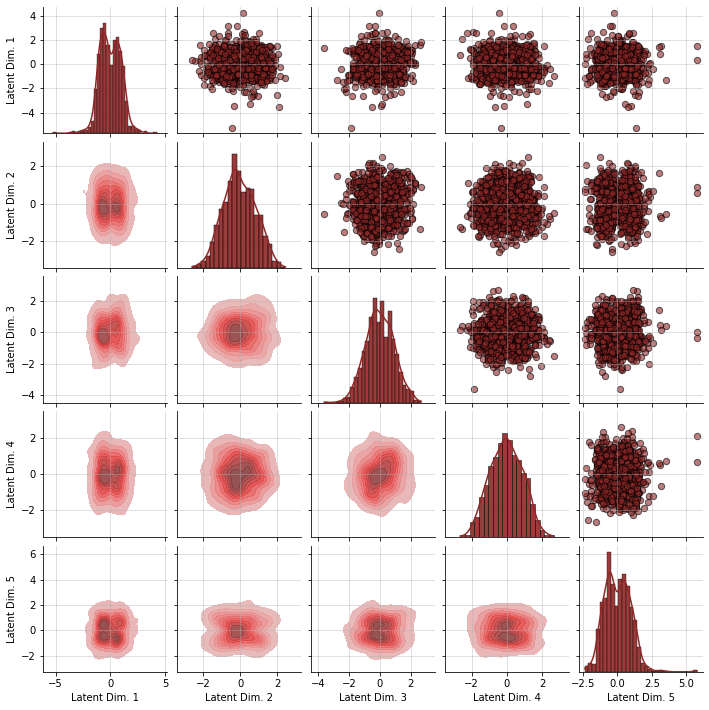

In [29]:
f = plot_latent_space_2d(z_p, height=2)

#### Likelihood

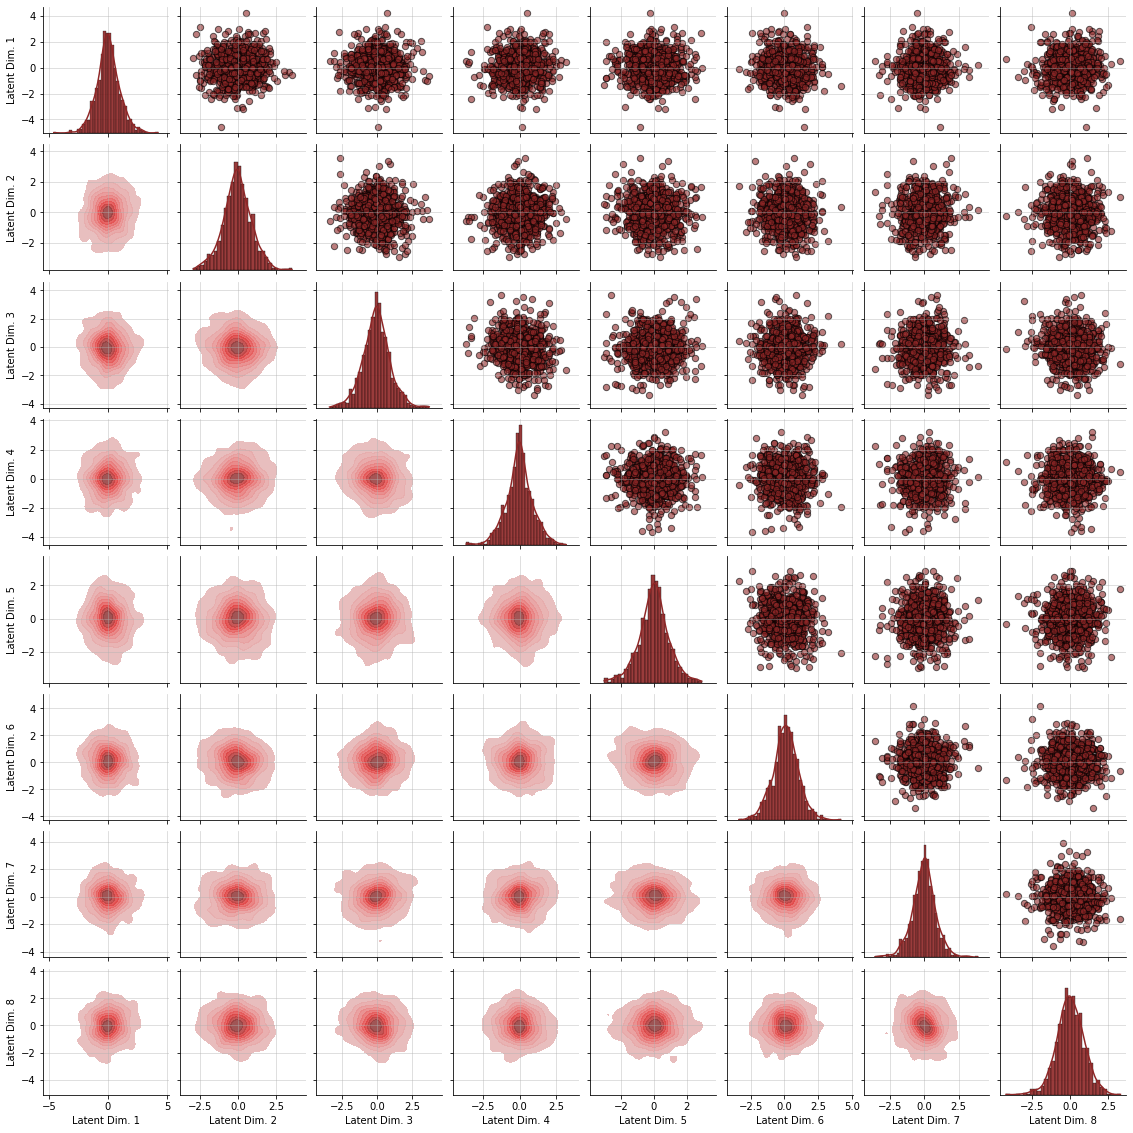

In [30]:
f = plot_latent_space_2d(z_l, height=2)

In [22]:
# Simulate from surrogate simulator
x_sim_s = amortizer.sample_data(test_dict, n_samples=1)
x_sim_s = tf.squeeze(x_sim_s)

# Sample from posteriors given surrogate outputs
post_samples_s = amortizer.sample_parameters({'direct_conditions': x_sim_s}, n_samples=250)

# Sample from posteriors given simulator outputs
post_samples = amortizer.sample_parameters(test_dict, n_samples=250)

# Prior samples
prior_samples = test_dict['posterior_inputs']['parameters']

### Calibration

#### ECDF Difference (Stacked)

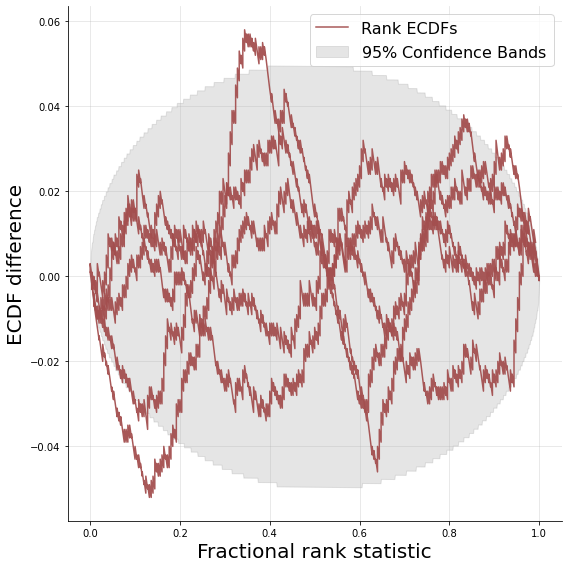

In [23]:
f = plot_sbc_ecdf(post_samples, prior_samples, ecdf_bands_kwargs=dict(confidence=0.95), stacked=True,
                  difference=True, fig_size=(8, 8), label_fontsize=20, legend_fontsize=16)
f.savefig(f'figures/calibration/{benchmark_name}.pdf')

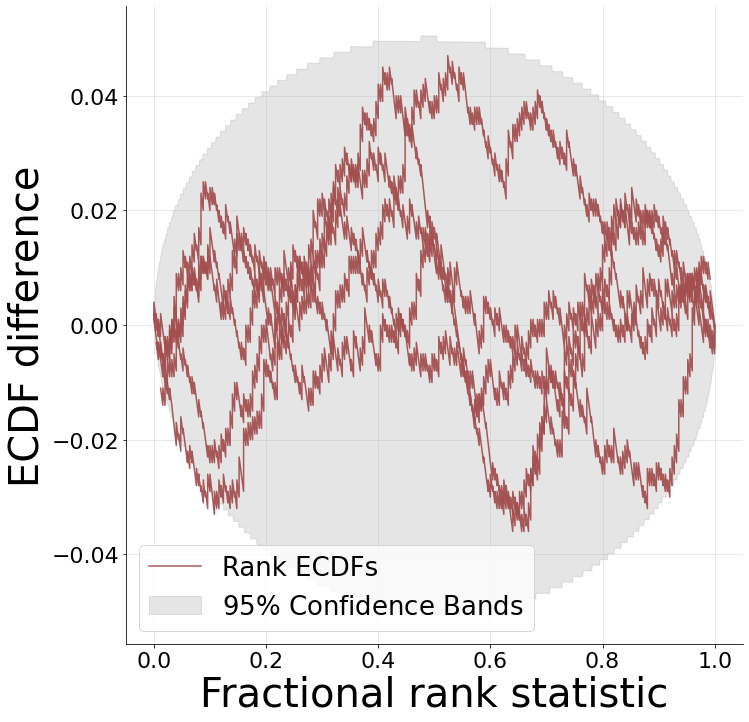

In [24]:
# Posterior given surrogate outputs
f = plot_sbc_ecdf(post_samples_s, prior_samples, ecdf_bands_kwargs=dict(confidence=0.95), stacked=True,
                  difference=True, fig_size=(10, 10), label_fontsize=40, legend_fontsize=26)
_ = plt.xticks(fontsize=22)
_ = plt.yticks(fontsize=22)
f.savefig(f'figures/calibration/{benchmark_name}_diff.pdf', dpi=300, bbox_inches='tight')

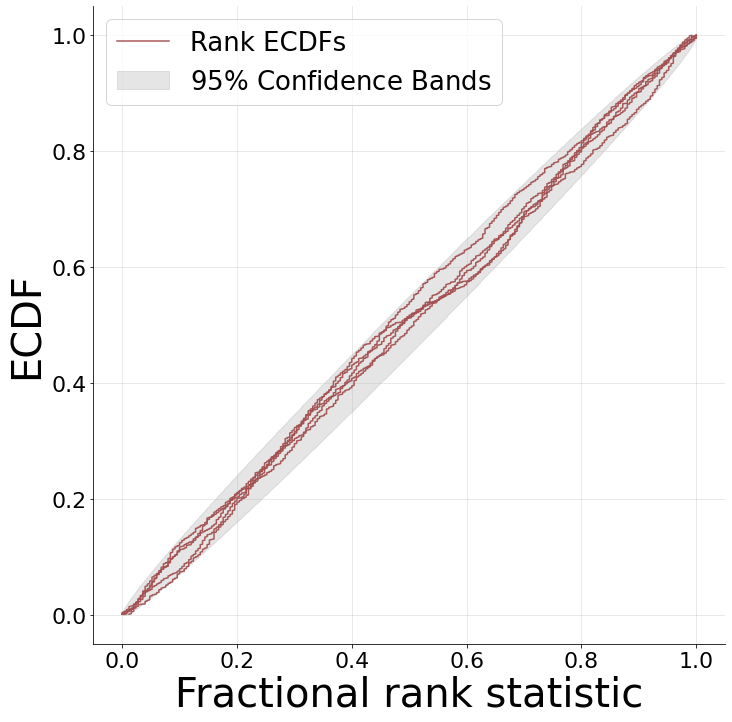

In [25]:
# Posterior given surrogate outputs
f = plot_sbc_ecdf(post_samples_s, prior_samples, ecdf_bands_kwargs=dict(confidence=0.95), stacked=True, fig_size=(10, 10), label_fontsize=40, legend_fontsize=26)
_ = plt.xticks(fontsize=22)
_ = plt.yticks(fontsize=22)
f.savefig(f'figures/calibration/{benchmark_name}.pdf', dpi=300, bbox_inches='tight')

#### Individual ECDF Plots

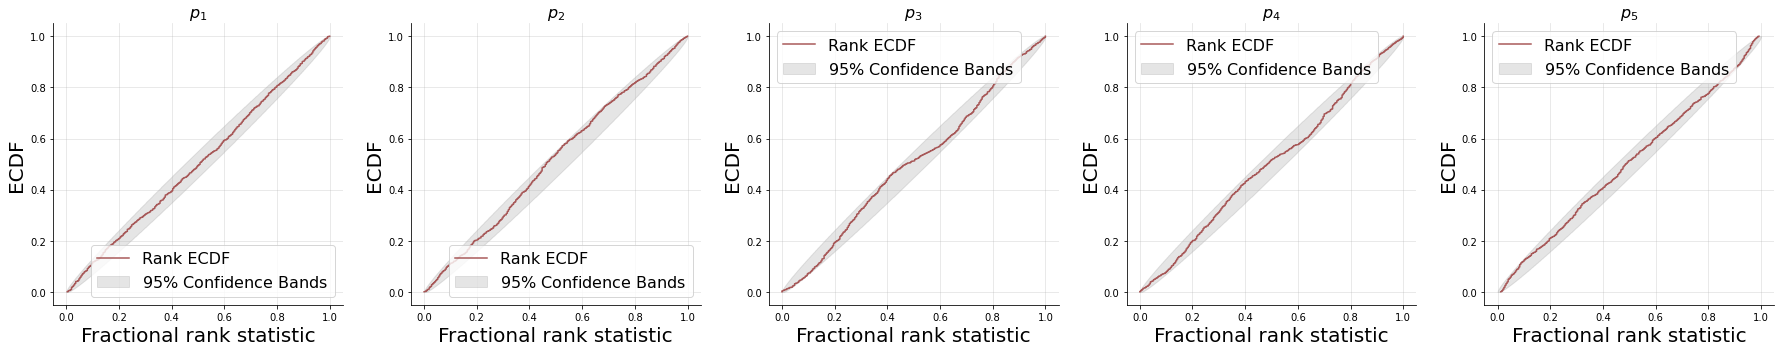

In [26]:
f = plot_sbc_ecdf(post_samples_s, prior_samples, ecdf_bands_kwargs=dict(confidence=0.95), 
                  label_fontsize=20, legend_fontsize=16)

#### Recovery
Observe the hints for bimodality!

In [ ]:
f = plot_recovery(post_samples, prior_samples)

### Some full posteriors

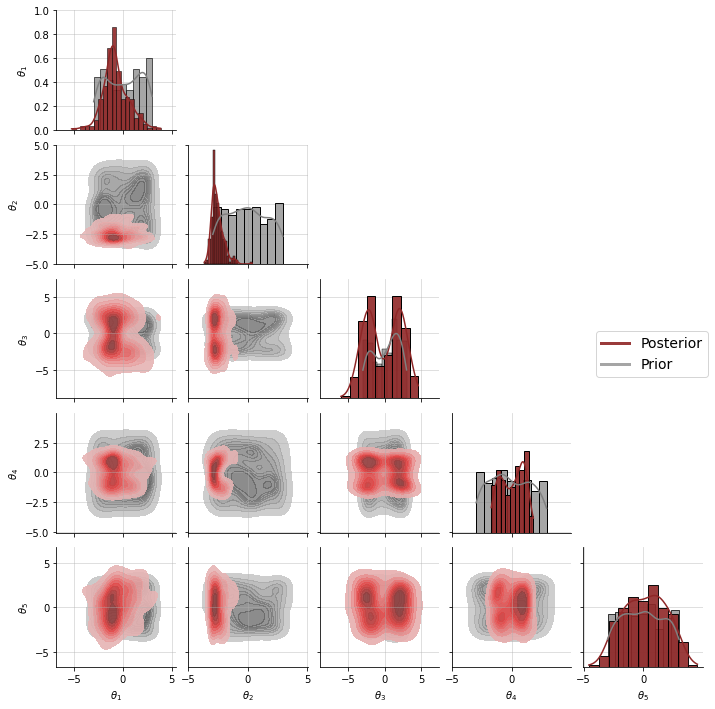

In [36]:
f = plot_posterior_2d(post_samples[0], prior=benchmark.generative_model.prior, height=2)

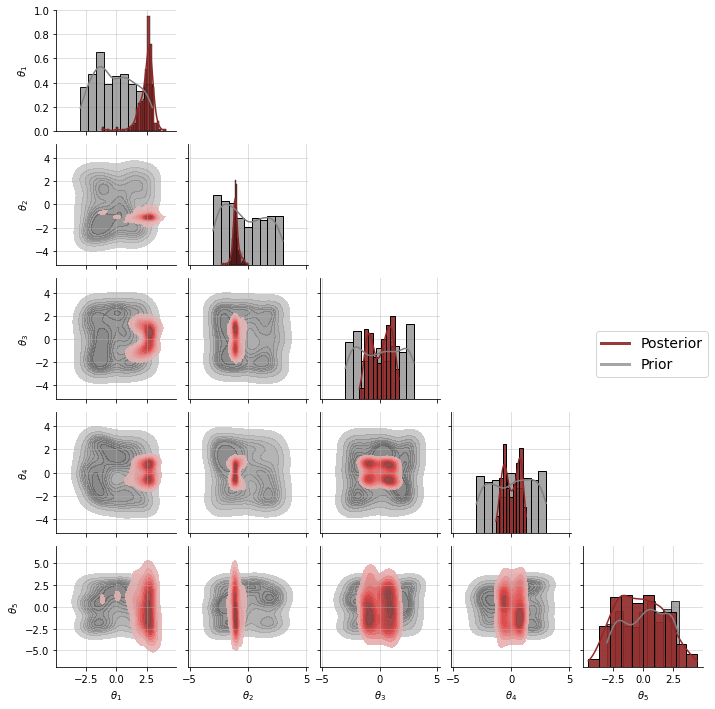

In [37]:
f = plot_posterior_2d(post_samples[1], prior=benchmark.generative_model.prior, height=2)

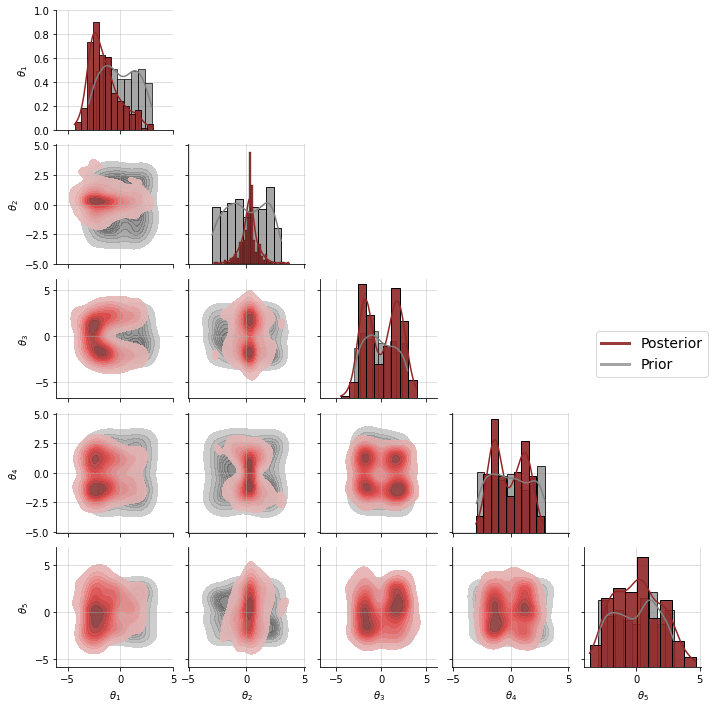

In [38]:
f = plot_posterior_2d(post_samples[2], prior=benchmark.generative_model.prior, height=2)